# USE GENERAL_PYTHON3

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
!which python

/home/clepore/.conda/envs/general_python3/bin/python


In [3]:
import os


In [4]:
import Nio
import glob

In [5]:
!ls /Data2/SubX/EMC/GEFS/tas_2m/1999/06


tas_2m_GEFS_02jun1999_00z_d01_d35_m00.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m01.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m02.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m03.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m04.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m05.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m06.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m07.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m08.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m09.grb2
tas_2m_GEFS_02jun1999_00z_d01_d35_m10.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m00.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m01.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m02.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m03.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m04.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m05.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m06.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m07.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m08.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m09.grb2
tas_2m_GEFS_09jun1999_00z_d01_d35_m10.grb2
tas_2m_GEFS_16jun1999_00z_d01_d35_m00.grb2
tas_2m_GEFS

In [6]:
!wgrib2  /Data2/SubX/EMC/GEFS/cape/1999/06/cape_GEFS_02jun1999_00z_d01_d35_m00.grb2

1:0:d=1999060200:CAPE:180-0 mb above ground:1 day fcst:ENS=low-res ctl
2:46954:d=1999060200:CAPE:180-0 mb above ground:2 day fcst:ENS=low-res ctl
3:92924:d=1999060200:CAPE:180-0 mb above ground:3 day fcst:ENS=low-res ctl
4:139690:d=1999060200:CAPE:180-0 mb above ground:4 day fcst:ENS=low-res ctl
5:186582:d=1999060200:CAPE:180-0 mb above ground:5 day fcst:ENS=low-res ctl
6:233994:d=1999060200:CAPE:180-0 mb above ground:6 day fcst:ENS=low-res ctl
7:281218:d=1999060200:CAPE:180-0 mb above ground:7 day fcst:ENS=low-res ctl
8:328742:d=1999060200:CAPE:180-0 mb above ground:8 day fcst:ENS=low-res ctl
9:375455:d=1999060200:CAPE:180-0 mb above ground:9 day fcst:ENS=low-res ctl
10:420780:d=1999060200:CAPE:180-0 mb above ground:10 day fcst:ENS=low-res ctl
11:465309:d=1999060200:CAPE:180-0 mb above ground:11 day fcst:ENS=low-res ctl
12:510293:d=1999060200:CAPE:180-0 mb above ground:12 day fcst:ENS=low-res ctl
13:555360:d=1999060200:CAPE:180-0 mb above ground:13 day fcst:ENS=low-res ctl
14:600065:d

In [7]:
ds = xr.open_dataset('/Data2/SubX/EMC/GEFS/pr_sfc/1999/06/pr_sfc_GEFS_02jun1999_00z_d01_d35_m00.grb2', 
                     engine='pynio')
ds

<xarray.Dataset>
Dimensions:          (forecast_time0: 35, lat_0: 181, lon_0: 360)
Coordinates:
  * lat_0            (lat_0) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * lon_0            (lon_0) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * forecast_time0   (forecast_time0) timedelta64[ns] 01:00:00 ... 1 days 11:00:00
Data variables:
    APCP_P1_L1_GLL0  (forecast_time0, lat_0, lon_0) float32 ...

In [23]:
ds  = ds.rename({list(ds.variables.keys())[0]:'pr', 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 35)
Coordinates:
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 11:00:00
Data variables:
    pr       (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [24]:
ds.coords['time']=np.arange(0.5,35.5)
ds.lon

<xarray.DataArray 'lon' (lon: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    long_name:  longitude
    grid_type:  Latitude/Longitude
    units:      degrees_east
    Dj:         [1.]
    Di:         [1.]
    Lo2:        [359.]
    La2:        [-90.]
    Lo1:        [0.]
    La1:        [90.]

####  The start time is at 00z the lead times at 12z - I am going to ignore this for the time being since I look at some accumulated/maximum weekly value

In [25]:
# def ppf(ds):
#     ds.coords['S'] = 'S', np.atleast_1d(ds.time[0].values) # I am setting S equal to the first time of the lead time, 
#                                                            # we can change that
#     return ds

In [26]:
def ppf2(ds):

    print( ds[list(ds.variables.keys())[0]].encoding['source'])
    ds  = ds.rename({ 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
    ds.coords['S'] = 'S', np.atleast_1d(ds.time[0].values - np.timedelta64(12, 'h'))
    ds.rename({'time':'L'}, inplace=True)
    ds.coords['L']=((ds.L-ds.S)/ np.timedelta64(1,'D')).squeeze()
    ds = ds.sel(lat=slice(42,32),lon=slice(-103+360,-90+360))
    return ds

In [28]:
varname = 'pr_sfc'
iy=1999
ds_M = []
for ensnum in np.arange(0,11):
    mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/06/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
    pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True, engine='pynio')
    pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
    print( pr_S)

KeyError: 'source'

In [15]:
varname = 'pr_sfc'
ds_Y = []
for iy in np.arange(1999, 2017):
    ds_M = []
    for ensnum in np.arange(0,11):
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/06//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)

        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/07//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/08//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_allpr = xr.concat(ds_Y, dim='S')
del ds_Y
ds_allpr.S
# ds_allpr.rename({variables.keys()[2]:'pr'}, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 45, M: 12, S: 18, lat: 11, lon: 14)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 1999-06-15 1999-06-20 ...
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lon      (lon) float32 257.0 258.0 259.0 260.0 261.0 262.0 263.0 264.0 ...
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 ...
  * M        (M) int64 1 1 1 2 2 2 3 3 3 4 4 4
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(12, 18, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gma

<xarray.Dataset>
Dimensions:  (L: 45, M: 12, S: 18, lat: 11, lon: 14)
Coordinates:
  * S        (S) datetime64[ns] 2007-06-05 2007-06-10 2007-06-15 2007-06-20 ...
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lon      (lon) float32 257.0 258.0 259.0 260.0 261.0 262.0 263.0 264.0 ...
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 ...
  * M        (M) int64 1 1 1 2 2 2 3 3 3 4 4 4
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(12, 18, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:35:02 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gma

<xarray.Dataset>
Dimensions:  (L: 45, M: 12, S: 18, lat: 11, lon: 14)
Coordinates:
  * S        (S) datetime64[ns] 2015-06-05 2015-06-10 2015-06-15 2015-06-20 ...
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lon      (lon) float32 257.0 258.0 259.0 260.0 261.0 262.0 263.0 264.0 ...
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 ...
  * M        (M) int64 1 1 1 2 2 2 3 3 3 4 4 4
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(12, 18, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:19:21 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gma

<xarray.DataArray 'S' (S: 324)>
array(['1999-06-05T00:00:00.000000000', '1999-06-10T00:00:00.000000000',
       '1999-06-15T00:00:00.000000000', ..., '2016-08-19T00:00:00.000000000',
       '2016-08-24T00:00:00.000000000', '2016-08-29T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 1999-06-15 1999-06-20 ...

In [18]:
varname = 'cape'
ds_Y = []
for iy in np.arange(1999, 2017):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jun//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)

        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jul//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/aug//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all

ds_allcape = xr.concat(ds_Y, dim='S')
del ds_Y
print ds_allcape.nbytes/1e9
# ds_allcape.S

0.107778508


In [16]:
varname = 'tas_2m'
ds_Y = []
for iy in np.arange(1999, 2017):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jun//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)

        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jul//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/aug//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all

ds_alltas_2m = xr.concat(ds_Y, dim='S')
del ds_Y
print ds_alltas_2m.nbytes/1e9
ds_alltas_2m.S

0.107778508


<xarray.DataArray 'S' (S: 324)>
array(['1999-06-05T00:00:00.000000000', '1999-06-10T00:00:00.000000000',
       '1999-06-15T00:00:00.000000000', ..., '2016-08-19T00:00:00.000000000',
       '2016-08-24T00:00:00.000000000', '2016-08-29T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 1999-06-15 1999-06-20 ...

In [17]:
varname = 'tdps_2m'
ds_Y = []
for iy in np.arange(1999, 2017):
    ds_M = []
    for ensnum in np.arange(1,5):
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jun//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)

        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/jul//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
        mylist = glob.glob('/Data2/SubX/NASA/GEOS_V2p1/'+varname+'/'+np.str(iy)+'/aug//*_m0'+np.str(ensnum)+'.nc') 
        pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True)
        pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_alltdps_2m = xr.concat(ds_Y, dim='S')
del ds_Y
print ds_alltdps_2m.nbytes/1e9
ds_alltdps_2m.S

0.107778508


<xarray.DataArray 'S' (S: 324)>
array(['1999-06-05T00:00:00.000000000', '1999-06-10T00:00:00.000000000',
       '1999-06-15T00:00:00.000000000', ..., '2016-08-19T00:00:00.000000000',
       '2016-08-24T00:00:00.000000000', '2016-08-29T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 1999-06-15 1999-06-20 ...

In [14]:
whos


Variable        Type        Data/Info
-------------------------------------
Nio             module      <module 'Nio' from '/home<...>-packages/PyNIO/Nio.pyc'>
calendar        module      <module 'calendar' from '<...>/python2.7/calendar.pyc'>
date            type        <type 'datetime.date'>
datetime        type        <type 'datetime.datetime'>
ds              Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ds_allcape      Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ds_allpr        Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ds_alltas_2m    Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ds_alltdps_2m   Dataset     <xarray.Dataset>\nDimensi<...>(http://mpimet.mpg.de/...
ensnum          int64       4
glob            module      <module 'glob' from '/hom<...>/lib/python2.7/glob.pyc'>
iy              int64       2016
mylist          list        n=6
np              module      <module 'numpy' from '/

# MERGE THEM IN ONE DATAARRAY

In [19]:
ds_allpr.merge(ds_allcape, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 45, M: 12, S: 324, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lon      (lon) float32 257.0 258.0 259.0 260.0 261.0 262.0 263.0 264.0 ...
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 ...
  * M        (M) int64 1 1 1 2 2 2 3 3 3 4 4 4
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 1999-06-15 1999-06-20 ...
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(12, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    cape     (M, S, L, lat, lon) float32 dask.array<shape=(12, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http

In [20]:
ds_allpr.merge(ds_alltas_2m, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 45, M: 12, S: 324, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lon      (lon) float32 257.0 258.0 259.0 260.0 261.0 262.0 263.0 264.0 ...
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 ...
  * M        (M) int64 1 1 1 2 2 2 3 3 3 4 4 4
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 1999-06-15 1999-06-20 ...
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(12, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    cape     (M, S, L, lat, lon) float32 dask.array<shape=(12, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(12, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
  

In [21]:
ds_allpr.merge(ds_alltdps_2m, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 45, M: 12, S: 324, lat: 11, lon: 14)
Coordinates:
  * L        (L) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lon      (lon) float32 257.0 258.0 259.0 260.0 261.0 262.0 263.0 264.0 ...
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 ...
  * M        (M) int64 1 1 1 2 2 2 3 3 3 4 4 4
  * S        (S) datetime64[ns] 1999-06-05 1999-06-10 1999-06-15 1999-06-20 ...
Data variables:
    pr       (M, S, L, lat, lon) float32 dask.array<shape=(12, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    cape     (M, S, L, lat, lon) float32 dask.array<shape=(12, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    tas      (M, S, L, lat, lon) float32 dask.array<shape=(12, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
    tdps     (M, S, L, lat, lon) float32 dask.array<shape=(12, 324, 45, 11, 14), chunksize=(1, 1, 45, 11, 14)>
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/.

In [26]:
del ds_alltas_2m
del ds_alltdps_2m
del ds_allcape

# SELECT LEAD TIMES

In [62]:
week1 = ds_allpr.sel(L=slice(1.5,7.5))
week1 = week1.stack(MSll=('M','S','lat','lon','L')).compute()
week1

<xarray.Dataset>
Dimensions:  (MSll: 4191264)
Coordinates:
  * MSll     (MSll) MultiIndex
  - M        (MSll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
  - S        (MSll) datetime64[ns] 1999-06-05 1999-06-05 1999-06-05 ...
  - lat      (MSll) float64 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 ...
  - lon      (MSll) float64 257.0 257.0 257.0 257.0 257.0 257.0 257.0 258.0 ...
  - L        (MSll) float64 1.5 2.5 3.5 4.5 5.5 6.5 7.5 1.5 2.5 3.5 4.5 5.5 ...
Data variables:
    pr       (MSll) float32 1.45447e-06 2.21444e-06 3.43661e-06 5.47569e-06 ...
    cape     (MSll) float32 57.8507 880.703 385.558 643.724 681.066 1004.0 ...
    tas      (MSll) float32 299.757 300.485 300.868 300.79 302.025 302.036 ...
    tdps     (MSll) float32 278.036 287.18 284.541 286.013 285.089 286.543 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Convention

In [73]:
week1.coords['MSll'] = np.arange(0,4191264) 
week1

<xarray.Dataset>
Dimensions:  (MSll: 4191264)
Coordinates:
  * MSll     (MSll) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    pr       (MSll) float32 1.45447e-06 2.21444e-06 3.43661e-06 5.47569e-06 ...
    cape     (MSll) float32 57.8507 880.703 385.558 643.724 681.066 1004.0 ...
    tas      (MSll) float32 299.757 300.485 300.868 300.79 302.025 302.036 ...
    tdps     (MSll) float32 278.036 287.18 284.541 286.013 285.089 286.543 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions:  COARDS
    History:      File written by MAPL_CFIO
    Title:        lena-S2S-2_1_CPLFCST20170811
    Contact:      http://gmao.gsfc.nasa.gov
    Institution:  NASA Global Modeling and Assimilation Office
    References:   http://gmao.gsfc.nasa.gov
    Comment:      lena-S2S-2_1_CPLFCST20170811
    CDO:          Climate Data Operators

In [74]:
# plt.hist(week1.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tasb"] = to_bin(week1.tas)
# 

# plt.hist(week1.tasb.values.ravel(),bins=20)

In [75]:
grouped1 = week1[['pr','tasb']].groupby('tasb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print iim,gp.pr.shape
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(tasb=k)] = var

ds_group


0 (2,)
1 (22,)
2 (164,)
3 (931,)
4 (4617,)
5 (16469,)
6 (43533,)
7 (87445,)
8 (145584,)
9 (229936,)
10 (275846,)
11 (260178,)
12 (190819,)
13 (98244,)
14 (35159,)
15 (7170,)
16 (932,)
17 (37,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 18)
Coordinates:
  * tasb       (tasb) float64 280.0 282.0 284.0 286.0 288.0 290.0 292.0 ...
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 99.1 99.5 99.9 99.95 ...
Data variables:
    pr         (tasb) float64 3.158e-05 0.0003874 0.0007239 0.0009821 ...
    pr_q       (quantiles, tasb) float64 0.0 0.0 0.0 0.0001309 9.473e-05 ...

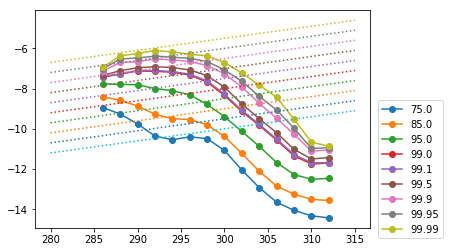

In [76]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-28,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.06*np.array([280,315]),':')


In [77]:
week2 = ds_allpr.sel(L=slice(8.5,14.5))
week2 = week2.stack(MSll=('M','S','lat','lon','L')).compute()
week2

<xarray.Dataset>
Dimensions:  (MSll: 4191264)
Coordinates:
  * MSll     (MSll) MultiIndex
  - M        (MSll) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
  - S        (MSll) datetime64[ns] 1999-06-05 1999-06-05 1999-06-05 ...
  - lat      (MSll) float64 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 ...
  - lon      (MSll) float64 257.0 257.0 257.0 257.0 257.0 257.0 257.0 258.0 ...
  - L        (MSll) float64 8.5 9.5 10.5 11.5 12.5 13.5 14.5 8.5 9.5 10.5 ...
Data variables:
    pr       (MSll) float32 6.51815e-08 1.67013e-07 2.29898e-08 1.75807e-08 ...
    cape     (MSll) float32 29.7604 36.3748 185.046 559.103 699.687 1093.92 ...
    tas      (MSll) float32 300.401 300.249 301.77 302.028 302.553 302.811 ...
    tdps     (MSll) float32 285.258 285.31 283.548 284.928 284.912 286.449 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.1 (http://mpimet.mpg.de/...
    history:      Thu Jan 18 12:10:32 2018: cdo.exe -L chname,PRECTOT,pr -set...
    Conventions

In [78]:
week2.coords['MSll'] = np.arange(0,4191264) 

In [79]:
# plt.hist(week2.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week2["tasb"] = to_bin(week2.tas)
# 

# plt.hist(week2.tasb.values.ravel(),bins=20)

In [80]:
grouped2 = week2[['pr','tasb']].groupby('tasb')
ds_group2 = grouped2.max()
ds_group2.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group2.quantiles.values),len(ds_group2.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped2):
    print iim,gp.pr.shape
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2['pr_q'].loc[dict(tasb=k)] = var

ds_group2


0 (32,)
1 (178,)
2 (563,)
3 (2880,)
4 (10857,)
5 (30746,)
6 (65045,)
7 (119906,)
8 (216154,)
9 (290011,)
10 (284600,)
11 (217824,)
12 (110737,)
13 (38113,)
14 (8558,)
15 (876,)
16 (8,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 17)
Coordinates:
  * tasb       (tasb) float64 282.0 284.0 286.0 288.0 290.0 292.0 294.0 ...
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 99.1 99.5 99.9 99.95 ...
Data variables:
    pr         (tasb) float64 0.0001326 0.0007936 0.0008433 0.001466 ...
    pr_q       (quantiles, tasb) float64 0.0 0.0 9.9e-05 5.73e-05 4.189e-05 ...

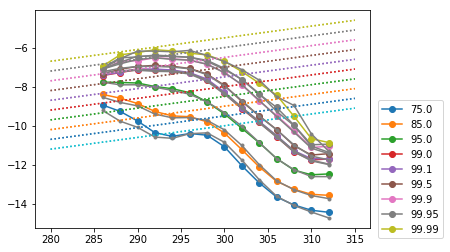

In [85]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-28,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.06*np.array([280,315]),':')
    
plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T),'.-', color='grey')
plt.legend(ds_group2.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-28,-23,0.5):
    plt.plot(np.array([280,315]),iim+0.06*np.array([280,315]),':')


In [82]:
# week3 = ds_allpr.sel(L=slice(15.5,21.5))